
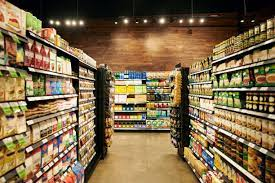

**Task**: `As a business manager, try to find out the weak areas where you can
work to make more profit`.
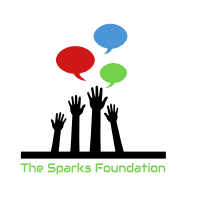

# Business Analytics

### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
sample_store = pd.read_csv("/kaggle/input/tsf-datasets/SampleSuperstore.csv")

In [ ]:
sample_store.head()

In [ ]:
sample_store.info()

In [ ]:
sample_store.shape

# Pre Processing the Data.

### No Null Value in the data

In [ ]:
sample_store.isnull().sum()

## Check Duplicate rows in the columns.

In [ ]:
sample_store.duplicated().sum()

* These are **Duplicate Rows**

In [ ]:
sample_store[sample_store.duplicated()]

### Drop Duplicate rows.

In [ ]:
sample_store.drop_duplicates()

### Drop the Postal Code because this column will not use in our analysis.

In [ ]:
sample_store.drop(columns=["Postal Code"] , axis = 1 , inplace=True)

### There is no such correlation in the sample store data. Slighty Correlation in the profit and sales column.

In [ ]:
sns.heatmap(sample_store.corr() , annot = True)

# Data Visualization

In [ ]:
plt.scatter(x = sample_store["Profit"] , y = sample_store["Sales"])

## 1. What are the weak areas where we need to work to make more profit?
* To answer this question let's make a plot on the Profit/Loss across all the states of USA.

In [ ]:
plt.figure(figsize = (17,9))
sns.countplot(sample_store["State"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Let's get some aggregated views from pairplot
sns.pairplot(sample_store)

## Check State Wise Profits and Sales.

In [ ]:
sample_store.groupby(['State'])[['Sales', 'Profit']].sum().sort_values("Profit" , ascending = False).head(5)

In [ ]:
sample_store.groupby(['State'])[['Sales', 'Profit']].sum().sort_values("Profit" , ascending = True).tail(5)

## Plotting the Geo-Spatial Graph on the state column to check profit and loss graphically.

In [ ]:
States_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
              'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 
              'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 
              'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
              'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
              'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
              'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
              'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
              'Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI',
              'Wyoming': 'WY'}
sample_store['States_code'] = sample_store.State.apply(lambda x: States_code[x])

In [ ]:
geo_data = sample_store.groupby(['States_code'])[['Sales', 'Profit']].sum()

fig = go.Figure(data=go.Choropleth(
    locations=geo_data.index, # Spatial coordinates
    z = geo_data.Profit, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, "Red"], [0.25, 'pink'], [0.45, 'lightblue'], [0.6, 'lightgreen'], [1, 'green']],
#      reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()

### The observations from the above graph are-

* The states like **California**, **New York** makes the highest profit of around 60k signified by the green colour.



* The **Washington** State is the Second Highest profit maker of around 30k signified by light green color.



* The blue and sky blue color signifies the states with average profit of around 25K and mainly in the north-east and south-east regeion.




* The state of **Texas**, proved to be the most expensive state for the company with a very high amount of loss of around 25K signified by the red colour.



* Second the most weaker areas are **Pennslyvania , Illinois and Ohio and North Carolina with the Avg loss of Around 10k signified by the Light red colour.




* The Companies will have to work very hard in these places So that they can avoid losses and they can get good profit from here too 

## Checkig  State wise sales.

In [ ]:
sample_store.groupby(['State'])[['Sales', 'Profit']].sum().sort_values("Sales" , ascending = False).head()

In [ ]:
sample_store.groupby(['State'])[['Sales', 'Profit']].sum().sort_values("Sales" , ascending = True).tail()

## Plotting the Geo-Spatial Graph to check the State wise Sales.

In [ ]:
plot_data = sample_store.groupby(['States_code'])[['Sales', 'Profit']].sum()


fig = go.Figure(data=go.Choropleth(
    locations=plot_data.index, 
    z = plot_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'blues',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

### The Observations from the above graph are:

* The company has the highest sales in the state of **California** selling around 450k of goods shown in dark blue.
* Second highest sales in the state of **New York** selling around 310k of goods shown in in light dark blue color.
* States like **Texas**, **Washington**, **Pennsylvania** also the Avg Sales of around 150k 

## Now Check a Category column to see that is there is any weak area?

In [ ]:
sample_store["Category"].value_counts()

In [ ]:
sample_store["Category"].value_counts().plot.bar(color = "brown")

In [ ]:
sample_store.groupby(['Category'])[['Sales', 'Profit']].sum().sort_values("Profit" , ascending = False)

In [ ]:
category = sample_store.groupby(['Category'])[['Sales', 'Profit']].sum()
category

In [ ]:
normalize = category.copy()

In [ ]:
cols = category.columns
cols

In [ ]:
for i in cols:
    print(i)

In [ ]:
for i in cols:
    normalize[i] = normalize[i]/normalize[i].sum()

In [ ]:
normalize.plot.bar(title = ("Category wise Sales and Profits") ,figsize = (12,6))


### Yes there is a weak area in the furniture section where we can need to work more .You can see it in the graph above The Sales is becoming so high that the profit is not even half of it why?.

* The first thing a company needs to know is that so many sales despite being Why is profit so low? 

## First we will show which Subcategory lies in which Category section.

In [ ]:
sample_store.groupby(["Category" , "Sub-Category"])[['Sales', 'Profit']].sum()

### Analyze Sub Category Column.

In [ ]:
sample_store.groupby("Sub-Category")["Discount"].sum().sort_values(ascending = False)

In [ ]:
plt.figure(figsize = (17,9))
sns.barplot(x = "Sub-Category" , y = "Discount" , data = sample_store)

* **Binders** , **Tables** , **Machines** , **Chairs** , **Book cases** are those sub-categories in which the company has given more discount.

##  Comparison between Profit and Discount

In [ ]:
#Plotting the chart for Profit vs Discount
sns.lineplot(x='Discount',y='Profit',label='Profit',data=sample_store)
plt.legend()
plt.show()

* This is a not good sign for company when companies gives more discount to his people.Due to which the profit is getting very low.


* view in graph The less discount a company offers, the more profit it has which means giving more discount to people our profit is being effected

## Comparison between Sales and Discount

In [ ]:
#Plotting the chart for Profit vs Discount
sns.lineplot(x='Discount',y='Sales',label='Sales',data=sample_store)
plt.title = ('Comparison between Sales and Discount')
plt.legend()
plt.show()

*` for the sales prospective as much as the company increasing discount That's how many sales are declining . but at one time when discount is 0.5% The sales rate is high. but overall company focusing on the discount section that morre discount will effect our profit seriosly`

In [ ]:
sub_cat = sample_store.groupby(["Sub-Category"])[['Sales', 'Profit']].sum()
sub_cat

In [ ]:
normalize = sub_cat.copy()

In [ ]:
cols = category.columns
cols

In [ ]:
for i in cols:
    print(i)

In [ ]:
for i in cols:
    normalize[i] = normalize[i]/normalize[i].sum()

In [ ]:
normalize.plot.bar(title = ("Sub-Category wise Sales and Profits") ,figsize = (12,6))

* Seeing the plot we can easily say that **Copiers** and **Accessories** is the Highest profit getting sub-category.Even the great things is that Profit is double to his sales.



* we can easily say that in the subcategory column there is highest amount of loss in the **tables** category and intresting things is that table lies in the furniture category which we have already highlighted that this is a wake area where the company can work.



* Second highest loss subcategory is **bookcases** which is also lies in the furniture category.And the main reason of lose is that, the the company is giving more discount to people.Which I have already mentioned that Where the company increasing the discount profit is very in these categories.



* we suggest our company to reduce the discount.If you want to make more profit in these subcategories.

### Working On Ship Mode Column.

In [ ]:
ship = sample_store.groupby(["Ship Mode"])[['Sales', 'Profit']].sum()

In [ ]:
norm = ship.copy()

In [ ]:
cols = norm.columns

In [ ]:
for i in cols:
    norm[i] = norm[i]/norm[i].sum()

In [ ]:
norm.plot.bar(figsize = (12,6))

In [ ]:
sns.catplot("Ship Mode", hue="Segment", data=sample_store, kind="count", aspect=1.5 , palette="Set1")

####  Consumer count is highest in each case and they generally prefer Standard Class. 

### Region Wise Proftis and Sales

In [ ]:
reg = sample_store.groupby("Region")[['Sales', 'Profit']].sum()
reg

In [ ]:
col = reg.columns

In [ ]:
for i in cols:
    reg[i] = reg[i]/reg[i].sum()

In [ ]:
reg.plot.bar(title = "Region Wise Proftis and Sales" , figsize = (10,6) , ylabel = "Profit and Sales in Percentage")

* Maximum Sales and Profit in the **West** Region.But in the Central Region Sales is more but profit is less.The company will have to see what is the reason behind this?

# Conclusion:

* This is a very simple Exploratory Data Analysis I performed. Many more aspects can be obtained from more detailed Analysis.